In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os
import tensorflow as tf
import tensorflow_io as tfio

In [2]:
AUDIO_PATH = './Data/Audio_Spotify_Test/'
IMAGE_PATH = './Data/Image_Spotify_Test/'

In [3]:
print('The genres used for classification:')
print(list(os.listdir(AUDIO_PATH)))

The genres used for classification:
['blues', 'classical', 'country', 'disco', 'hip-hop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Make spectrograms for audio input

In [5]:
def save_melspectrogram(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig(save_path)
    plt.close()

In [12]:
genres = list(os.listdir(AUDIO_PATH))

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre
    image_path = IMAGE_PATH + '/' + genre

    for filename in list(os.listdir(genre_path)):
        image_name = os.path.splitext(filename)[0] + '.png'
        
        y, sr = librosa.load(genre_path + '/' + filename)
        save_melspectrogram(y, sr, image_path + '/' + image_name)


# Try something different

Also data augmentation techniques such as frequecny and time masking and adding noise to the input (deviation 0.01 * 30s).

In [3]:
def save_mel_ampl(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_0.png')
    plt.close()

    S_masked = tfio.audio.freq_mask(tf.convert_to_tensor(S_db), param=10)
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_masked.numpy(), sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_1.png')
    plt.close()

    S_masked = tfio.audio.time_mask(tf.convert_to_tensor(S_db), param=10)
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_masked.numpy(), sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_2.png')
    plt.close()

    S_masked = tf.convert_to_tensor(S_db) + tf.random.normal(tf.shape(tf.convert_to_tensor(S_db)), mean=0, stddev=0.3, dtype=tf.float32)
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_masked.numpy(), sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '_3.png')
    plt.close()

In [3]:
def save_mel_ampl(y, sr, save_path):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    
    plt.figure(figsize=(2.56, 2.56))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.axis('off')
    plt.savefig(save_path + '.png')
    plt.close()

In [4]:
genres = list(os.listdir(AUDIO_PATH))

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre
    image_path = IMAGE_PATH + '/' + genre

    # print(len(list(os.listdir(genre_path))))
    for filename in list(os.listdir(genre_path)):
        image_name = os.path.splitext(filename)[0]
        
        if not os.path.exists(image_path + '/' + image_name + '.png'):
            y, sr = librosa.load(genre_path + '/' + filename)
            save_mel_ampl(y, sr, image_path + '/' + image_name)

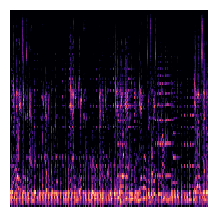

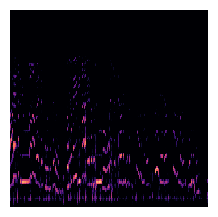

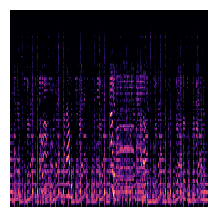

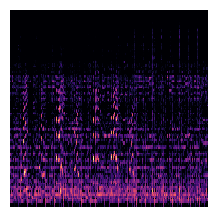

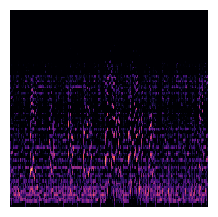

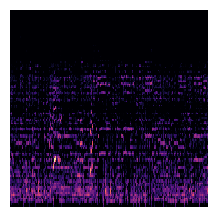

In [9]:
genres = list(os.listdir(AUDIO_PATH))

counter = 0

for genre in genres:
    genre_path = AUDIO_PATH + '/' + genre

    for filename in list(os.listdir(genre_path)):
        if counter > 5:
            break
        counter += 1
        y, sr = librosa.load(genre_path + '/' + filename)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_db = librosa.amplitude_to_db(S, ref=np.max)
        
        plt.figure(figsize=(2.56, 2.56))
        librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
        plt.axis('off')
        # plt.savefig(save_path)
        plt.show()
        # plt.close()
    
    break
        